In [1]:
# 2018-04-09 -- Steve Dow -- Homework
# ## Unit 7 | Assignment - Distinguishing Sentiments

# In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various 
# news oulets, and to present your findings visually.

# Your final output should provide a visualized summary of the sentiments expressed in Tweets 
# sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

# (Deliverable 1) The first plot will be and/or feature the following:
# * Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, 
#   ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, 
#   and +1 the most positive sentiment possible.
# * Each plot point will reflect the _compound_ sentiment of a tweet.
# * Sort each plot point by its relative timestamp.

# (Deliverable 2) The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. 
# For this plot, you will again aggregate the compound sentiments analyzed by VADER.

# The tools of the trade you will need for your task as a data analyst include the following: 
# tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

# Your final Jupyter notebook must:
# * Pull last 100 tweets from each outlet.
# * Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
# * Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, 
#   and negative sentiment scores.
# * Export the data in the DataFrame into a CSV file.
# * Save PNG images for each plot.

# As final considerations:
# * Use the Matplotlib and Seaborn libraries.
# (Deliverable 3) * Include a written description of three observable trends based on the data.
# * Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
# (Deliverable 4) * Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.


In [2]:
# Dependencies
import pandas as pd
import tweepy
import time
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = "1FDMEahjFGKkgQbhA4aBoChbl"
consumer_secret = "ifGWFwIaLddfsOAyFpxg1VXoi7Y3O4lUpMe0ss1NPMHwwDv7qI"
access_token = "1412065645-qJM4pv2r5Xb84H2Fg2tTbzzWilCTTqSNjpQCAuz"
access_token_secret = "F8sXI3t0SOv5LcDY37zao3UpZnfUHps8aKOzpYphKicPy"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [4]:
# Target User Accounts
target_user = ("@BBCWorld","@CBSNews","@cnnbrk","@nytimes","@FoxNews")
#target_user = ("@CBSNews")

usernames = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
text_list = []
date_list = []
converted_date_list = []
time_diff_list = []


# Loop through each user
for user in target_user:

    #time_diff = 0 
   
    
    # Variables for holding sentiments

    # 20 tweets/page x 5 pages = 100 tweets
    for x in range(1,6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            text = tweet["text"]
            date = tweet["created_at"]
            converted_date = datetime.strptime(date, "%a %b %d %H:%M:%S %z %Y")
            #time_diff = converted_date - time_diff

            # Add each value to the appropriate list
            usernames.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            text_list.append(text)
            date_list.append(date)
            converted_date_list.append(converted_date)
            #time_diff_list.append(time_diff)
            
# Create a dictionary of results
dict_results = {
 "Username": usernames,
 "Compound Score": compound_list,
 "Postive Score": positive_list,
 "Neutral Score": neutral_list,
 "Negative Score": negative_list,
 "Text": text_list,
 "Date": converted_date_list,
# "Time Diff": time_diff_list
 }



In [5]:
# Create DataFrame
results_df = pd.DataFrame(dict_results).set_index("Username").round(2)
results_df

,Compound Score,Date,Negative Score,Neutral Score,Postive Score,Text
Username,,,,,,
@BBCWorld,0.18,2018-04-08 03:40:10+00:00,0.27,0.40,0.34,Egypt's problem with sexy cinema https://t.co/...
@BBCWorld,-0.48,2018-04-08 03:04:01+00:00,0.24,0.76,0.00,Japanese father arrested for caging son for ov...
@BBCWorld,-0.62,2018-04-08 01:18:36+00:00,0.27,0.73,0.00,How the crisis in the Gulf could spread to Eas...
@BBCWorld,-0.60,2018-04-08 01:15:33+00:00,0.38,0.62,0.00,"Obituary: Keith Murdoch, the disgraced All Bla..."
@BBCWorld,-0.36,2018-04-08 01:15:31+00:00,0.26,0.74,0.00,How 'condom snorting' turned into a pro-gun ar...
@BBCWorld,0.00,2018-04-08 01:09:24+00:00,0.00,1.00,0.00,Inside the White House Bible Study group https...
@BBCWorld,0.51,2018-04-08 01:04:19+00:00,0.00,0.73,0.27,"'I paid $90,000 to free my family from IS' htt..."
@BBCWorld,-0.91,2018-04-08 00:33:12+00:00,0.53,0.47,0.00,"Syria war: Scores dead in Syria gas attack, re..."
@BBCWorld,0.00,2018-04-07 22:46:40+00:00,0.00,1.00,0.00,Trump Tower fires: Blaze breaks out at New Yor...


In [6]:
# Finally, export this file 
results_df.to_csv("2018-04-09-Dow-NewsStats.csv", index=False)


In [7]:
# Create a scatter plot 
#results_df.plot(kind="scatter", x="Date", y="Compound Score", grid=True, figsize=(20,10),
#              title="Sentiment Analysis of Media Tweets (4/06/2018)")
#look at datetime stamping import date? - look at weathe rone solved
#plt.show()

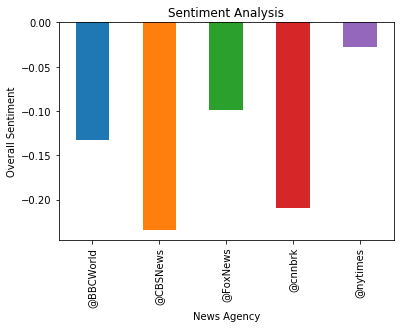

In [8]:
# Split up our data into groups
results_grouped_by_user = results_df.groupby("Username").mean()
grouped_sentiment = results_grouped_by_user["Compound Score"]

# Chart our data, give it a title, and label the axes
results_chart = grouped_sentiment.plot(kind="bar", title="Sentiment Analysis")
results_chart.set_xlabel("News Agency")
results_chart.set_ylabel("Overall Sentiment")
plt.savefig("2018-04-09-Dow-News-Sentiment.png")
plt.show()